In [21]:
#importing stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [22]:
exp = np.array([[20, 15],
                [5, 2],
                [12, 21],
                [21, 13],
                [2, 7],
                [12, 20],
                ])
df = pd.DataFrame(data=exp, columns=["Poids", "Taille"])
print("\n Notre Matrice \n\n X=")
display(df)


 Notre Matrice 

 X=


,Poids,Taille
0,20,15
1,5,2
2,12,21
3,21,13
4,2,7
5,12,20


In [23]:
print("\n =====> Etape 1: Centrer le tableau \n\n X-g =")
df1 = pd.DataFrame()
for i in df:
    df1[i] = df[i] - df[i].mean()
display(df1)


 =====> Etape 1: Centrer le tableau 

 X-g =


,Poids,Taille
0,8.0,2.0
1,-7.0,-11.0
2,0.0,8.0
3,9.0,0.0
4,-10.0,-6.0
5,0.0,7.0


In [24]:
print(" =====> Etape 2: Calculer la matrice variance covariance \n\n V=")
V = 1 / df1.shape[0] * df1.T @ df1 
display(V)

 =====> Etape 2: Calculer la matrice variance covariance 

 V=


,Poids,Taille
Poids,49.0,25.500000
Taille,25.5,45.666667


In [25]:
print(" =====> Etape 3: Détermination de la métrique")
print(" #### Les données sont heterogenes #### \n\n M=")
m = np.zeros((df.shape[1], df.shape[1]), float)
j = "Poids"
for i in range(df.shape[1]):
    m[i][i] = 1 / V[j][j]
    j = "Taille"
M = pd.DataFrame(data=m, index=["r1", "r2"], columns=["c1", "c2"])
display(M)
print("\n V*M=\n")
VM = pd.DataFrame(data=np.dot(V, M))
display(VM)

 =====> Etape 3: Détermination de la métrique
 #### Les données sont heterogenes #### 

 M=


,c1,c2
r1,0.020408,0.000000
r2,0.000000,0.021898



 V*M=



,0,1
0,1.000000,0.558394
1,0.520408,1.000000


In [26]:
print(" =====> Etape 4: Recherche des axes principaux 𝑼𝒌 de la matrice (VM)")
print(" #### Calculer les valeurs propres de la matrice (V.M) :")
valeurs, vecteurs = np.linalg.eig(VM)
count = 0
for i in valeurs[::-1]:
    count += 1
    print("λ"+str(count)+" =", i)
print(" #### Trier les valeurs propres par ordre décroissant :")
sorted_valeurs = np.sort(valeurs)[::-1]
list_valeurs = sorted_valeurs.tolist()
count = 0
for i in list_valeurs:
    count += 1
    print("λ"+str(count)+" =", i)

 =====> Etape 4: Recherche des axes principaux 𝑼𝒌 de la matrice (VM)
 #### Calculer les valeurs propres de la matrice (V.M) :
λ1 = 0.4609333255639322
λ2 = 1.5390666744360677
 #### Trier les valeurs propres par ordre décroissant :
λ1 = 1.5390666744360677
λ2 = 0.4609333255639322


In [27]:
print(" =====> Calculer la qualité de représentation :")
q = 0
ls = 0
list_valeurs_principaux = []
for i in list_valeurs:
    if q < 0.8:
        ls += i
        list_valeurs_principaux.append(i)
        q = ls / sum(list_valeurs)
print("Q =",q)
count = 0
print(" #### Les valeurs principaux sont:")
for i in list_valeurs_principaux:
    count += 1
    print("λ"+str(count)+" =", i)

 =====> Calculer la qualité de représentation :
Q = 1.0
 #### Les valeurs principaux sont:
λ1 = 1.5390666744360677
λ2 = 0.4609333255639322


In [28]:
print(" =====> Etape 6: Calculer les vecteurs propres 𝑼𝒌 :")
list_vecteurs_principaux = []
for i in range(len(list_valeurs_principaux)):
    list_vecteurs_principaux.append(vecteurs[i])
count = 0
for i in list_vecteurs_principaux:
    count+= 1
    print("U"+str(count)+" =", i)
list_vecteurs_principaux = list_vecteurs_principaux[::-1]

 =====> Etape 6: Calculer les vecteurs propres 𝑼𝒌 :
U1 = [ 0.71944815 -0.71944815]
U2 = [0.69454616 0.69454616]


In [40]:
print(" =====> Etape 7: Calculer les composantes principales :")
list_composantes_principales =  []
print(list_vecteurs_principaux)
for i in range(len(list_vecteurs_principaux)):
    list_composantes_principales.append( df1.values.dot(np.dot(m,list_vecteurs_principaux[i])) )
C = pd.DataFrame()
count = 0
for i in list_composantes_principales:
    count += 1
    C["U"+str(count)] = i
print(" #### Le nouveau espace: \n\n C =")
display(C)

 =====> Etape 7: Calculer les composantes principales :
[array([0.69454616, 0.69454616]), array([ 0.71944815, -0.71944815])]
 #### Le nouveau espace: 

 C =


,U1,U2
0,0.143813,0.085952
1,-0.266520,0.070519
2,0.121672,-0.126035
3,0.127570,0.132144
4,-0.232998,-0.052300
5,0.106463,-0.110280


 =====> Etape 8: Représenter graphiquement


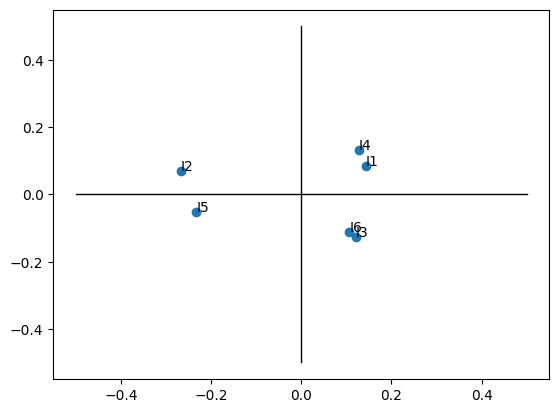

In [30]:
print(" =====> Etape 8: Représenter graphiquement")
# Draw the black lines
plt.plot([-0.5, 0.5], [0, 0], 'k-', lw=1)
plt.plot([0, 0], [-0.5, 0.5], 'k-', lw=1)

plt.scatter(C["U1"], C["U2"])
n = []
for i in range(len(C.index)):
    n.append("I"+str(i+1))
for i, txt in enumerate(n):
    plt.annotate(txt, (C["U1"][i], C["U2"][i]))


In [31]:
print(" =====> Etape 9: Les contributions aux inerties : \n")
print(" #### Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘 \n")
count = 0
l = []
for i in range(len(list_vecteurs_principaux)):
    print("\nPar rapport à l'axe U"+str(i+1)+"\n")
    count += 1
    individu = 0
    for index, row in df1.iterrows():
        X = np.array([row[0], row[1]])
        xm = np.dot(M, X)
        cos = np.dot(xm, list_vecteurs_principaux[i])**2 / np.dot(xm, X)**2
        l.append(cos)
        print("cos²(O"+str(individu)+str(count)+") =", cos)

 =====> Etape 9: Les contributions aux inerties : 

 #### Part d’inertie de 𝑋𝑖 prise en compte par l’axe 𝑈𝑘 


Par rapport à l'axe U1

cos²(O01) = 0.010647592001986245
cos²(O01) = 0.005332879563092843
cos²(O01) = 0.007537411971830984
cos²(O01) = 0.005955486002434361
cos²(O01) = 0.006782621719283522
cos²(O01) = 0.009844782983615978

Par rapport à l'axe U2

cos²(O02) = 0.003803358864125745
cos²(O02) = 0.00037335211267605655
cos²(O02) = 0.008087588028169017
cos²(O02) = 0.006390193009911318
cos²(O02) = 0.0003417411176861021
cos²(O02) = 0.01056338028169014


In [32]:
print(" Représente la contribution de l’individu par rapport au nouvel espace \n\n")
half = len(l) // 2
cos1 = l[:half]
cos2 = l[half:]
count = 0
for i in range(len(cos1)):
    count += 1
    print("p"+str(count) + " =", cos1[i] + cos2[i])

 Représente la contribution de l’individu par rapport au nouvel espace 


p1 = 0.01445095086611199
p2 = 0.005706231675768899
p3 = 0.015625
p4 = 0.012345679012345678
p5 = 0.007124362836969623
p6 = 0.020408163265306117


In [33]:
print('#### Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:')
count = 0
for i in range(len(list_vecteurs_principaux)):
    print("\nPar rapport à l'axe U"+str(i+1)+"\n")
    count = 1
    individu = 0
    for index, row in df1.iterrows():
        X = np.array([row[0], row[1]])
        xm = np.dot(M, X)
        pik =(1/len(df1.index) * (np.dot(xm, list_vecteurs_principaux[i]))**2) / list_valeurs_principaux[i]
        individu += 1
        print("p"+str(individu)+str(count)+" =", pik)

#### Contribution relative de l’individu 𝑋𝑖 à l’inertie expliquée de l’axe 𝑈𝑘:

Par rapport à l'axe U1

p11 = 0.002239699991775932
p21 = 0.007692224756807065
p31 = 0.0016031527021511882
p41 = 0.001762326619117562
p51 = 0.005878912823917813
p61 = 0.0012274137875845036

Par rapport à l'axe U2

p11 = 0.002671314845472961
p21 = 0.0017981591544134617
p31 = 0.005743689902010584
p41 = 0.006313969712733817
p51 = 0.0009890448482290405
p61 = 0.004397512581226853


In [34]:
print(" =====> Etape 10: Représentation des variables à l’aide du coefficient de corrélation:")
cor1 = 1 / df1.shape[0] * (df1['Poids'] @ C['U1']) / (math.sqrt(V["Poids"]["Poids"]) * math.sqrt(list_valeurs_principaux[0]))
cor2 = 1 / df1.shape[0] * (df1['Poids'] @ C['U2']) / (math.sqrt(V["Poids"]["Poids"]) * math.sqrt(list_valeurs_principaux[1]))

cor3 = 1 / df1.shape[0] * (df1['Taille'] @ C['U1']) / (math.sqrt(V["Taille"]["Taille"]) * math.sqrt(list_valeurs_principaux[0]))
cor4 = 1 / df1.shape[0] * (df1['Taille'] @ C['U2']) / (math.sqrt(V["Taille"]["Taille"]) * math.sqrt(list_valeurs_principaux[1]))


corr = pd.DataFrame({"U1": [cor1, cor3], "U2": [cor2, cor4]}, index=["N1", 'N2'])
display(corr)

 =====> Etape 10: Représentation des variables à l’aide du coefficient de corrélation:


,U1,U2
N1,0.124638,0.066852
N2,0.125960,-0.075206


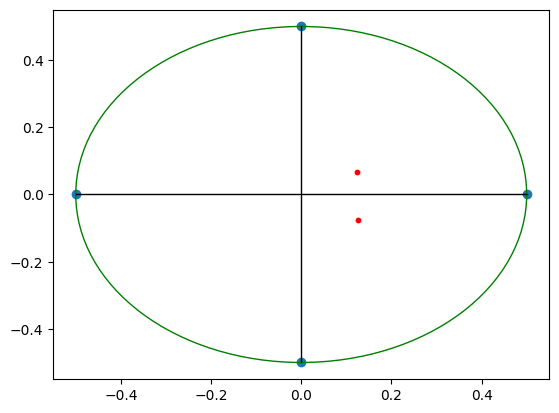

In [39]:
# the correlation coefficients represantation for each variable
x = [-0.5, 0.5, 0, 0]
y = [0, 0, -0.5, 0.5]

fig, ax = plt.subplots()
plt.scatter(x, y)

# draw a circle around the points
circle = plt.Circle((0, 0), radius=0.5, facecolor='none', edgecolor='green')
ax.add_artist(circle)

ax.plot([-0.5, 0.5], [0, 0], 'k-', lw=1)
ax.plot([0, 0], [-0.5, 0.5], 'k-', lw=1)


ax.scatter([cor1, cor3], [cor2, cor4], c='r', s=10)

plt.show()